In [1]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
url = "https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/refs/heads/main/clustering/mall_customers.csv"
data = pd.read_csv(url)

# Visualização inicial dos dados
print("Primeiras linhas do dataset:")
print(data.head())
print("\nInformações do dataset:")
print(data.info())

Primeiras linhas do dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [3]:
# Análise Exploratória de Dados (EDA)
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())


Estatísticas descritivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


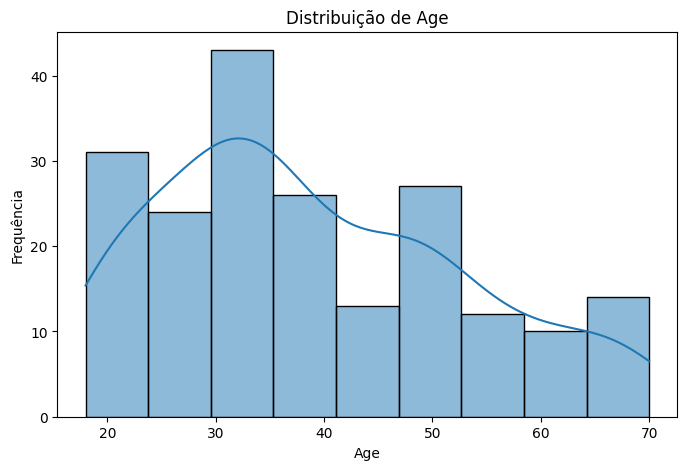

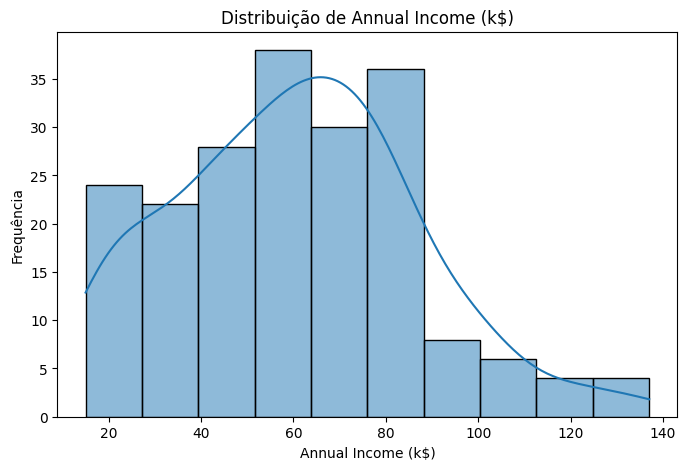

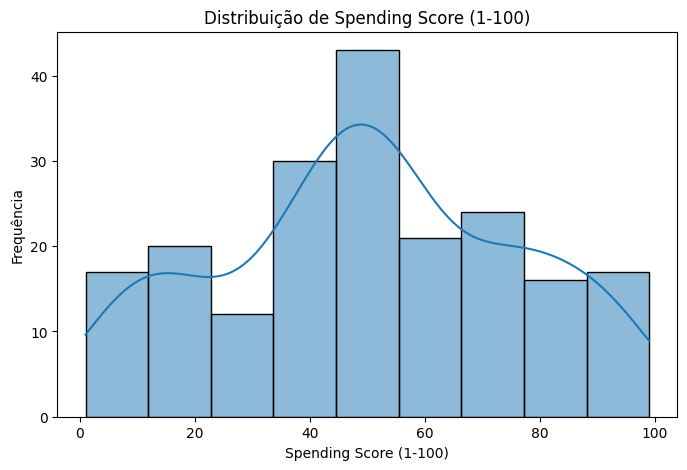

In [4]:
# Distribuição de algumas variáveis
columns_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

In [9]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())

# Pré-processamento
# Selecionando colunas relevantes para clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Normalizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


Valores ausentes por coluna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
# Modelagem com K-Means
# Encontrando o número ideal de clusters (método Elbow)
inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

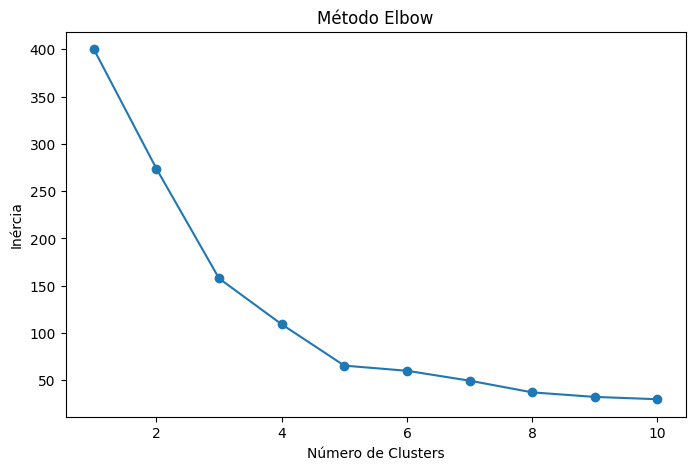

In [17]:
# Plotando o método Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Método Elbow")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

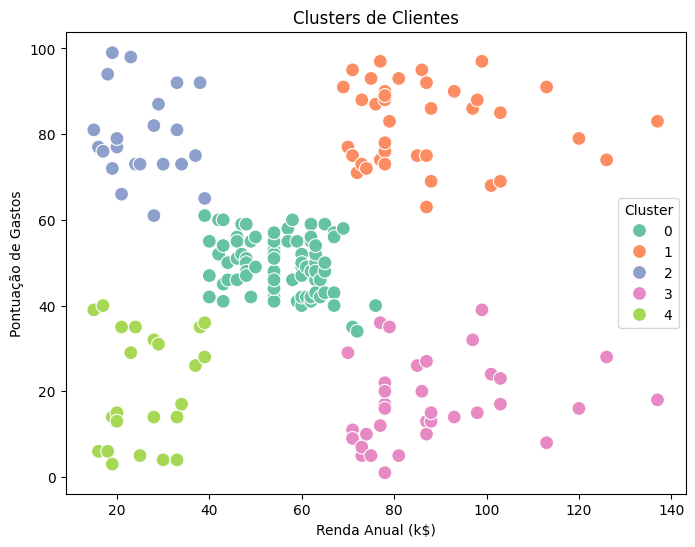

In [18]:
# Ajustando K-Means com o número ideal de clusters (por exemplo, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualização dos Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title("Clusters de Clientes")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Pontuação de Gastos")
plt.legend(title="Cluster")
plt.show()

In [19]:
# Avaliação com Silhouette Score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score para K-Means: {silhouette_avg:.2f}")

Silhouette Score para K-Means: 0.55


In [20]:
# Modelagem com DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

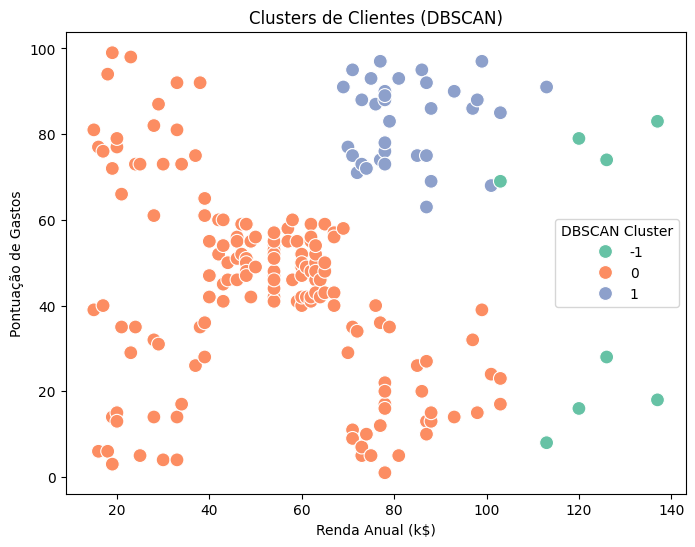

In [21]:
# Visualizando clusters do DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['DBSCAN_Cluster'],
    palette='Set2',
    s=100
)
plt.title("Clusters de Clientes (DBSCAN)")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Pontuação de Gastos")
plt.legend(title="DBSCAN Cluster")
plt.show()